**GIVEN 5 FEATURES PREDICT THE AIR QUALITY INDEX**




## Importing Standard Liberaries

In [0]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

## Reading Data

In [2]:
df=pd.read_csv("Train.csv")
df.head(5)

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.293416,-0.945599,-0.421105,0.406816,0.525662,-82.154667
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997,-48.897960
2,0.236425,0.132836,-0.147723,0.699854,-0.187364,77.270371
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168,-2.988581
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077,-37.596722


In [0]:
data=df.values
xtrain=data[:,0:5]
ytrain=data[:,-1]

## Preprocessing the Data

In [4]:
# We need to find mean ann std deviation about each columns
u=np.mean(xtrain,axis=0)
std=np.std(xtrain,axis=0)
print(u.shape)
print(std.shape)

(5,)
(5,)


In [0]:
#Normalization
xtrain=(xtrain-u)/std

## Visualize the data 

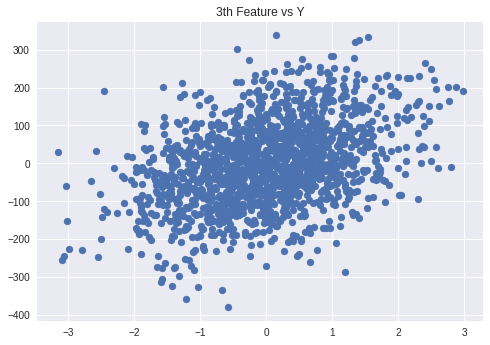

In [6]:
# Plot Y vs any feature
plt.style.use('seaborn')
plt.scatter(xtrain[:,3],ytrain)
plt.title('3th Feature vs Y')
plt.show()

## Making Data Ready for Algorithm

In [7]:
ones=np.ones((xtrain.shape[0],1))
xtrain=np.hstack((ones,xtrain))
print(xtrain.shape) #Adding a Dummy Feature

(1600, 6)


## Gradient Descent Algorithm

In [0]:
# Helper Functions
def hypothesis(x,theta):
  return np.dot(x,theta)
def error(X,y,theta):
  e=0.0
  m=X.shape[0]
  y_=hypothesis(X,theta)
  e=np.sum((y-y_)**2 )
  return e/m 
def gradient(X,y,theta):
  m,n=X.shape 
  y_=hypothesis(X,theta)
  grad=np.dot(X.T,(y_-y))
  return grad/m 

In [0]:
def gradient_descent(X,y,learning_rate=0.1,max_epochs=350):
  n=X.shape[1] 
  theta=np.zeros((n,))
  error_list=[]
  for i in range(max_epochs):
    e=error(X,y,theta)
    error_list.append(e)
    #Gradient Descent 
    grad=gradient(X,y,theta)
    theta=theta-learning_rate*grad 
  return theta,error_list 

## Training 

In [10]:
import time
start=time.time()
theta,error_list=gradient_descent(xtrain,ytrain)
end=time.time()
print("Time Taken is ",end-start)

Time Taken is  0.032498836517333984


## Visualising Error Function

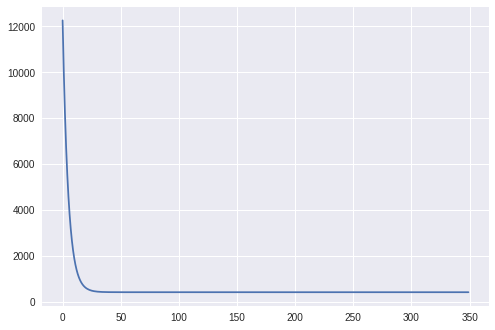

In [11]:
plt.plot(error_list)

## Predictions

**Reading Test Data**

In [0]:
dftest=pd.read_csv('Test.csv')
xtest=dftest.values
xtest=np.hstack((np.ones((xtest.shape[0],1)),xtest))
y_=hypothesis(xtest,theta)

## Getting Predictions.csv

In [0]:
pd.DataFrame(y_).to_csv("Predictions.csv")